## Streamlit Demo

To install Streamlit, we only need a single line in Python, using pip 

Then, we can start using Streamlit functionalities based on our needs, by importing it in our notebook and declaring it, like any other python module/library

# Import the necessary libraries

In [32]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [33]:
path = kagglehub.dataset_download("anandshaw2001/video-game-sales")

df = pd.read_csv(path + "/vgsales.csv")

# EDA

In [34]:
df.info()
print("Missing values per column:\n", df.isnull().sum())
print("Shape:", df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Missing values per column:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Shape: (1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
df = df[df["Year"] != "N/A"]
df = df[df["Year"].notna()]
df = df[df["Year"] != 0]
df = df[df["Publisher"] != 0]
df = df[df["Publisher"].notna()]
df["Platform"] = df["Platform"].astype(str)
df["Year"] = df["Year"].fillna(0).astype(int)
df = df[df["Global_Sales"].notna()]

df.info()
print("Missing values after cleaning:\n", df.isnull().sum())
df.head()
print("Shape after cleaning:", df.shape)

#print (df["Year"].unique())
#print (df["Publisher"].unique())

print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
Missing values after cleaning:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Shape after cleaning: (16291, 11

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Exploratory Visualizations

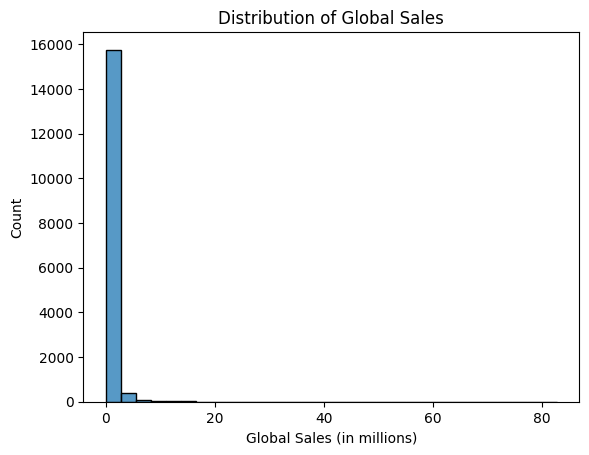

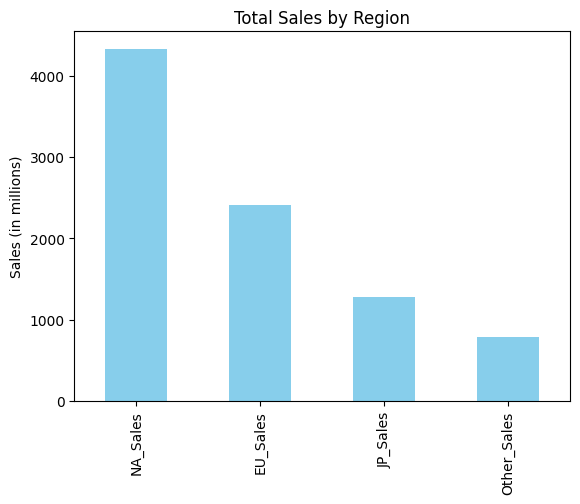

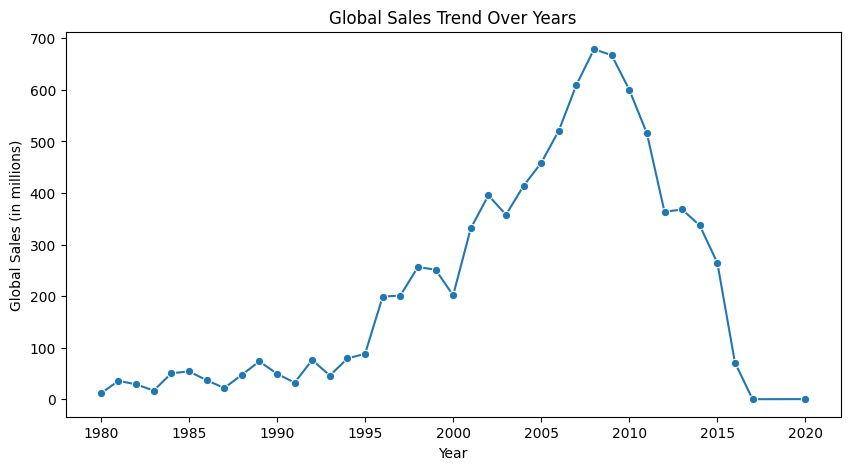

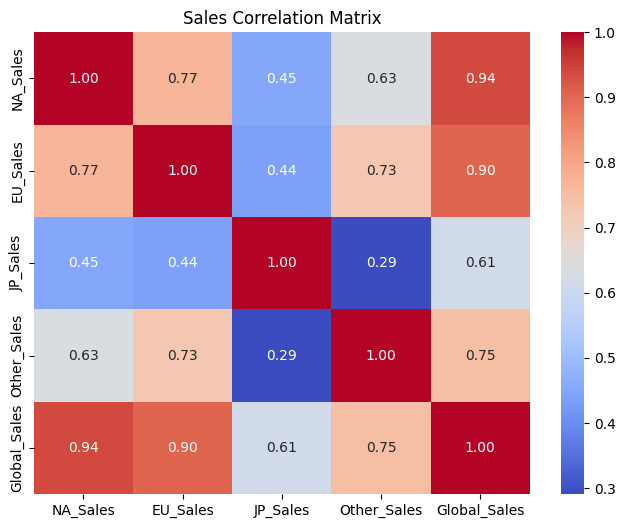

C:\Users\kaaro\AppData\Local\Temp\ipykernel_28572\348502345.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Global Sales (in millions)')

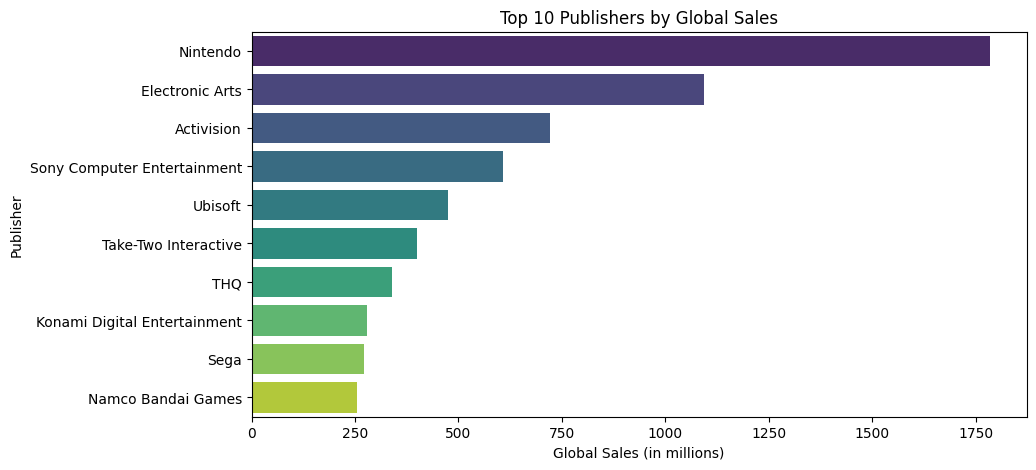

In [ ]:
sns.histplot(df['Global_Sales'], bins=30)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Count")
plt.show()

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_regions = df[regions]
df_regions.sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.ylabel("Sales (in millions)")
plt.show()

sales_by_year = df.groupby("Year")["Global_Sales"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Global_Sales", data=sales_by_year, marker="o")
plt.title("Global Sales Trend Over Years")
plt.ylabel("Global Sales (in millions)")
plt.show()

corr_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sales Correlation Matrix")
plt.show()

top_publishers = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="Global_Sales", y="Publisher", data=top_publishers, palette="viridis")
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Global Sales (in millions)")